In [10]:
#Importing all the necessary modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [12]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [14]:
#Loading the dataframe
df=pd.read_csv("D:\Misc\Projects_ML\loan_data_set.csv")

In [15]:
#Checking the columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [17]:
#Dropping the unnecessary columns before the train test split
df.drop(['Loan_ID', 'Gender', 'Dependents', 'Married'], axis=1, inplace=True)

In [18]:
#Checking the null values after droping unnecessary columns
df.isnull().sum()

Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
#Replace the null values of self employed
df.Self_Employed.fillna('No', inplace=True)

In [20]:
#Replace the null values for Loan amount and loan amount term with their respective mean
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

In [21]:

#Replace the null values for credit history
df['Credit_History'].value_counts()
df.Credit_History.fillna(0.0, inplace=True)

In [22]:
#Final check,if there are any null values
df.isnull().sum().any()

False

In [23]:
#So there are no null values in the present features
#Checking the maximum and minimum amount of the Applicant income
df.loc[df['ApplicantIncome'].idxmax()]

Education            Graduate
Self_Employed              No
ApplicantIncome         81000
CoapplicantIncome           0
LoanAmount                360
Loan_Amount_Term          360
Credit_History              0
Property_Area           Rural
Loan_Status                 N
Name: 409, dtype: object

In [24]:
df.loc[df['ApplicantIncome'].idxmin()]

Education            Graduate
Self_Employed              No
ApplicantIncome           150
CoapplicantIncome        1800
LoanAmount                135
Loan_Amount_Term          360
Credit_History              1
Property_Area           Rural
Loan_Status                 N
Name: 216, dtype: object

In [25]:
#Using Label encoding for multiple columns
colums_in_list=df.columns.tolist()
le = LabelEncoder()
for col in colums_in_list:
    if df[col].dtype==object:
         df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [27]:
df.dtypes

Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

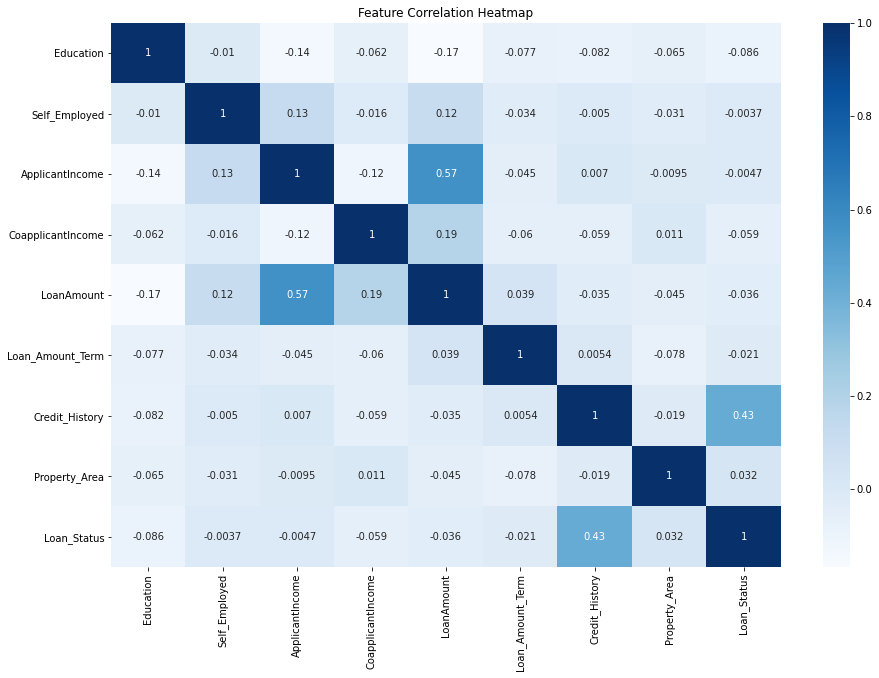

In [29]:
#Correlation of the features
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

In [30]:
#Preparing the input and output 
X = df.drop("Loan_Status", axis=1)
Y= df["Loan_Status"]

In [31]:
#Splitting the train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=30) 

In [32]:
#Logistic Regression
model_lr= LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [33]:
#Decision tree
model_decisiontree=DecisionTreeClassifier()
model_decisiontree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
#Random Forest
model_randomforest= RandomForestClassifier(n_estimators=100)
model_randomforest.fit(X_train, Y_train)

RandomForestClassifier()

In [35]:
#Suppart Vector Machine (SVC)
model_SVC=SVC()

model_SVC.fit(X_train,Y_train)

SVC()

In [36]:
#XGB classifier
model_XGB=XGBClassifier()
model_XGB.fit(X_train, Y_train)

C:\Users\HP\anaconda3\envs\workenv\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
#Checking the accuracy in Logistic Regression

acc_lr=model_lr.score(X_test,Y_test)
print("Logistic Regression accuracy is ",format(acc_lr*100))

Logistic Regression accuracy is  74.5945945945946


In [38]:
#Checking the accuracy in Decision Tree
acc_dt=model_decisiontree.score(X_test,Y_test)
print("Decision Tree accuracy is ",format(acc_dt*100))

Decision Tree accuracy is  63.24324324324324


In [39]:
#Random Forest
model_randomforest= RandomForestClassifier(n_estimators=100)
model_randomforest.fit(X_train, Y_train)
acc_rf=model_randomforest.score(X_test,Y_test)
print("Random forest accuracy is ",format(acc_rf*100))

Random forest accuracy is  70.27027027027027


In [40]:
#Checking the accuracy in Suppart Vector Machine
acc_svc=model_SVC.score(X_test,Y_test)
print("SVC accuracy is ",format(acc_svc*100))


SVC accuracy is  71.89189189189189


In [41]:
#Checking the accuracy in Random Forest
acc_XGB=model_XGB.score(X_test,Y_test)
print("XGBClassifier accuracy is ",format(acc_XGB*100))

XGBClassifier accuracy is  73.51351351351352


###### Therefore,for loan prediction,it can be seen that the Logistic regression has high accuracy.